# 🎮 테일러룰을 활용한 게임 데이터 분석

## 📌 모델 개요
이 모델은 게임 내 밸런스 변수(진행도, 경제, 난이도)가 D1 잔존율(D1 Retention)에 미치는 영향을 분석하기 위해  
테일러룰을 응용합니다.

### 🎯 D1 잔존율(D1 Retention)이란?
- **0일차(첫 플레이) 이후 1일차에 다시 접속한 유저 비율**을 의미합니다.
- 가입일의 게임 내 진행도, 경제 밸런스, 난이도 조절이 **유저 유지율에 영향을 미칠 가능성이 있음**

---

## 📌 1. 게임 데이터 분석 응용 테일러룰 방정식

게임 데이터 분석을 위해 테일러룰을 다음과 같은 형태로 변형하여 추정합니다.

$$
d1\_retention_t = \gamma + \beta_1 \cdot \text{progression\_balance\_gap}_t + \beta_2 \cdot \text{economy\_balance\_gap}_t + \beta_3 \cdot \text{difficulty\_balance\_gap}_t + \delta_1 \cdot \text{new\_users\_gap}_t + \delta_2 \cdot \text{d0\_iap\_user\_ratio\_gap}_t + \delta_3 \cdot \text{holiday}_t + \epsilon_t
$$

- **종속 변수 (Dependent Variable)**
  - $ d1\_retention_t $ : 유저의 다음날 리텐션(D1 Retention)  

- **내생 변수 (Endogenous Variables)**  
  - $ \text{progression\_balance\_gap} $ : **진행도 밸런스 갭**
  - $ \text{economy\_balance\_gap} $ : **경제 밸런스 갭**
  - $ \text{difficulty\_balance\_gap} $ : **난이도 밸런스 갭**

- **외생 변수 (Exogenous Variables)**  
  - $ \text{new\_users\_gap} $ : 신규 유저 변동량  
  - $ \text{d0\_iap\_user\_ratio\_gap} $ : 결제 유저 비율 변동량  
  - $ \text{holiday} $ : 휴일 여부 (더미 변수, 0 또는 1)  

- **추정할 계수 (Parameters to Estimate)**
  - $ \beta_1, \beta_2, \beta_3 $ : 내생 변수 계수 (게임 밸런스가 리텐션에 미치는 영향)  
  - $ \delta_1, \delta_2, \delta_3 $ : 외생 변수 계수 (신규 유저 유입, 결제 유저 변화, 휴일 효과)  
  - $ \gamma $ : 상수항  
  - $ \epsilon_t $ : 오차항  

> **해석**  
> - 게임 내 **진행도, 경제, 난이도 밸런스가 적절할수록 유저 리텐션이 증가**  
> - **신규 유저 유입(new_users_gap) 및 결제 유저 비율(d0_iap_user_ratio_gap)** 도 리텐션에 영향을 미칠 수 있음  
> - 주말/공휴일에는 유저 활동량 증가 가능성 ($ \delta_3 $ 계수로 조정)  

---

## 📌 2. 종속 변수 ($ y_{t+1} $)

$$
y_{t+1} = \mathrm{d1\_retention}_{t}
$$

- **D1 잔존율**은 유저가 0일차(첫 플레이) 후 1일차에도 게임을 플레이하는 비율을 의미함
- 즉, **게임 초기 유저 유지율을 결정하는 요인을 분석하는 것이 목표**임

---

## 📌 3. 내생 변수

### 게임 내 밸런스 갭(Gap)
게임 내 **진행도, 경제, 난이도 밸런스 갭**을 분석하기 위해,  
각 변수의 **잠재 수준(Potential Value)과 실제 값(Actual Value)의 차이(Gap)를 측정**합니다.  
이 방법은 경제학에서 사용하는 **GDP 갭(Output Gap)** 개념을 기반으로 합니다.

> ⚠ **가중치 설명**  
> 각 변수에 적용된 가중치 값(예: 0.4, 0.3 등)은 **가상의 시나리오를 반영하기 위한 값**입니다.  
> 실전 분석에서는 데이터에 따라 적절한 가중치를 조정해야 합니다.


#### 🔹 진행도 밸런스 ($\mathrm{progression\_balance\_gap}$)
진행도는 **유저의 평균 진행 속도를 나타내는 지표**로, 다음과 같은 요소들을 조합하여 계산합니다.

$$
\mathrm{progression\_balance} =
\left(\frac{\mathrm{d0\_max\_stage\_level} - \mu}{\sigma} \times 0.4\right) +
\left(\frac{\mathrm{d0\_quest\_completion\_rate} - \mu}{\sigma} \times 0.4\right) +
\left(\frac{-1 \times (\mathrm{daily\_active\_users} - \mu)}{\sigma} \times 0.2\right)
$$

- **스테이지 진행도** (`d0_max_stage_level`): 유저가 도달한 최고 스테이지  
- **퀘스트 완료율** (`d0_quest_completion_rate`): 진행도 유지율  
- **일일 활성 유저 수** (`daily_active_users`): 유저가 많을수록 콘텐츠 소비 속도가 증가하므로 **음(-)의 가중치 부여**   

- **진행도 밸런스 갭 (Gap) 계산** : HP 필터를 사용하여 진행도 지표의 잠재 수준(Potential)을 계산한 후, 실제 진행도와 비교하여 갭을 계산
$$
\mathrm{progression\_balance\_gap} = \left(\mathrm{progression\_balance} - \mathrm{progression\_balance\_potential}\right) \times 100
$$

- 양(+)의 갭
  - 진행도가 너무 빠르면 → GDP 과열 상태와 유사 (과도한 성장으로 인해 신규 콘텐츠 부족 위험)
  - 유저의 진행도가 너무 빠르면 레벨 확장, 신규 콘텐츠 추가 필요
- 음(-)의 갭
  - 진행도가 너무 느리면 → 경기 침체와 유사 (유저들이 성장하지 못하고 이탈 가능성 증가)
  - 진행도가 너무 느리면 보상 증가, 성장 속도 조절 필요

#### 🔹 경제 밸런스 ($\mathrm{economy\_balance\_gap}$)
경제 밸런스는 **게임 내 화폐(Soft & Hard Currency) 수급 균형**을 나타내는 지표입니다.

1. **소프트 화폐 비율 계산**
$$
\mathrm{soft\_currency\_ratio} = \frac{\mathrm{d0\_soft\_currency\_get} - \mathrm{d0\_soft\_currency\_use}}{\mathrm{d0\_soft\_currency\_get}}
$$

2. **하드 화폐 비율 계산**
$$
\mathrm{hard\_currency\_ratio} = \frac{\mathrm{d0\_hard\_currency\_get} - \mathrm{d0\_hard\_currency\_use}}{\mathrm{d0\_hard\_currency\_get}}
$$

3. **경제 밸런스 계산 (소프트 & 하드 화폐 50:50 비율)**
$$
\mathrm{economy\_balance} = \frac{\mathrm{soft\_currency\_ratio\_gap} + \mathrm{hard\_currency\_ratio\_gap}}{2}
$$

4. **경제 밸런스 갭 (Gap) 계산** : HP 필터를 사용하여 경제 밸런스의 잠재 수준(Potential)을 계산한 후, 실제 경제 밸런스와 비교하여 갭을 계산
$$
\mathrm{economy\_balance\_gap} = \left(\mathrm{economy\_balance} - \mathrm{economy\_balance\_potential}\right) \times 100
$$

- 양(+)의 갭 
  - 인플레이션 발생 (유저들이 쉽게 재화를 획득하고, 게임 내 가치 하락)
  - 유저가 화폐를 지나치게 많이 보유하면 경제 밸런스 조정 (재화 사용 유도, 가격 조정)
- 음(-)의 갭
  - 디플레이션 발생 (유저들이 원하는 아이템을 구매하지 못해 스트레스
  - 화폐 부족 현상이 지속되면 획득량 증가, 보상 체계 조정 필요

#### 🔹 난이도 밸런스 ($\mathrm{difficulty\_balance\_gap}$)
게임의 난이도 밸런스는 **승률과 보스 클리어율**을 기반으로 측정합니다.

$$
\mathrm{difficulty\_balance} =
\left(\frac{-1 \times |\mathrm{d0\_avg\_win\_rate} - 0.5|}{\sigma} \times 0.4\right) +
\left(\frac{\mathrm{d0\_boss\_success\_rate} - \mu}{\sigma} \times 0.3\right)
$$

- **승률** (`d0_avg_win_rate`): 50%에 가까울수록 공정한 난이도  
- **보스 클리어율** (`d0_boss_success_rate`): 난이도 변화를 반영하는 주요 지표  
- **승률이 0.5에서 벗어날수록 난이도가 불균형하다고 판단** (음의 가중치 적용)  

- 난이도 밸런스 갭 (Gap) 계산 : HP 필터를 사용하여 난이도의 잠재 수준(Potential)을 계산한 후, 실제 난이도와 비교하여 갭을 계산
$$
\mathrm{difficulty\_balance\_gap} = \left(\mathrm{difficulty\_balance} - \mathrm{difficulty\_balance\_potential}\right) \times 100
$$

- 양(+)의 갭
  - 게임의 난이도가 너무 높으면 유저 좌절감 증가
  - 튜토리얼 보강, 난이도 조절 옵션 제공 필요
- 음(-)의 갭
  - 게임의 난이도가 너무 낮으면 도전 요소 부족
  - 유저가 너무 쉽게 클리어하면 보상 감소 또는 난이도 조정 필요

> 🎯 **게임 산업 해석**:  
> - 게임 내 밸런스 변화가 유저 잔존율에 영향을 미칠 가능성이 있음
> - 경제 밸런스가 지나치게 흐트러지면 과금 유저와 무과금 유저 간 격차가 심해질 수 있음
> - 난이도 조절이 제대로 이루어지지 않으면 유저 이탈이 가속화될 가능성이 있음

---

## 📌 4. 외생 변수

- **$ \mathrm{new\_users\_gap} $**: 신규 유저 변동량 갭갭
  - 잠재 유저 유입량(Potential New Users) 을 기준으로 신규 유저 변동량을 측정
  - 양(+)의 갭 
    - 신규 유저가 증가하는 상황 → 튜토리얼 및 초기 게임 경험이 중요 
    - 신규 유저 유입량이 갑자기 증가하면, 초기 경험(UX/UI, 난이도, 보상 설계)이 리텐션에 미치는 영향을 분석해야 함

  - 음(-)의 갭 
    - 신규 유저가 감소하는 상황 → 신규 유저 유입 전략 필요
    - 신규 유저의 유입이 잠재 수준을 밑돌면, 마케팅 강화 및 신규 콘텐츠 추가 전략이 필요


- **$ \mathrm{d0\_iap\_user\_ratio\_gap} $**: 결제 유저 비율의 변동량 갭갭 
  - 잠재 결제 유저 비율(Potential IAP Ratio) 대비 현재 결제 유저 비율의 차이를 측정
  - 양(+)의 갭
    - 결제 유저가 증가하는 상황 → 과금 요소가 잔존율(Retention)에 미치는 영향 분석 필요
    - 결제 유저 비율이 급격히 증가하면, 과금 모델이 게임 밸런스에 영향을 미쳐 유저 이탈을 유발할 가능성이 있음
  - 음(-)의 갭
    - 결제 유저 감소 → 게임 경제 구조 조정 필요
    - 결제 유저 비율이 급격히 감소하면, 게임 초기 과금 모델 개선 전략 필요요

  → 인앱 결제 비율이 급격히 증가하면, 과금 요소가 잔존율에 영향을 미칠 가능성이 있음
- **$ \mathrm{holiday} $**: 휴일 여부 더미 변수(0 : 평일, 1 : 주말 또는 공휴일)  
  - 주말과 공휴일에는 게임 접속률이 상승할 가능성이 높음
  - 주말 효과(Holiday Effect) 를 활용하여 게임 이벤트 및 콘텐츠 업데이트 전략을 최적화 가능
  - 주말과 공휴일에 특정 이벤트(보너스 경험치, 한정 보상 등)를 추가하여 유저 참여도를 극대화
  - 만약 휴일에 리텐션이 낮아진다면, 콘텐츠 피로도(Fatigue)가 증가하는지 분석 후 조정 필요

---

## 📌 5. 도구 변수 (Instrumental Variables)

$$
Z_t =
\begin{bmatrix}
\mathrm{progression\_balance\_gap}_{t-1}, \dots, \mathrm{progression\_balance\_gap}_{t-10} \\
\mathrm{economy\_balance\_gap}_{t-1}, \dots, \mathrm{economy\_balance\_gap}_{t-10} \\
\mathrm{difficulty\_balance\_gap}_{t-1}, \dots, \mathrm{difficulty\_balance\_gap}_{t-10}
\end{bmatrix}
$$

- **과거 14일간의 게임 밸런스 지표를 도구 변수로 사용**  
- 현재 내생 변수와 독립적이면서도 유의미한 설명력을 가지도록 설계됨됨

> 🎯 **게임 산업 해석**:  
> - 하루 만에 게임 밸런스가 바뀌는 경우는 거의 없음
> - **과거 밸런스의 변화 추이를 고려해야 내생성 문제를 해결할 수 있음**
> - 예를 들어, **진행도 밸런스가 1~2주 동안 지속적으로 악화되면 이탈 가능성이 높아짐**

---

## 📌 결론
- **D1 잔존율을 예측하도록 테일러룰을 변형한 GMM 모델을 설계**
- **게임 밸런스(진행도, 경제, 난이도)가 D1 유저 잔존율에 미치는 영향을 분석**
- **과거 밸런스 변화를 도구 변수로 사용하여 내생성 문제 해결**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.iv import IVGMM
from statsmodels.tsa.filters.hp_filter import hpfilter
from numpy.linalg import matrix_rank

# 샘플 데이터 생성 (일별 시계열 데이터)
n_days = 365
np.random.seed(42)

dates = pd.date_range(start='2024-01-01', periods=n_days, freq='D')

def skewed_distribution(mean, size, shape=2):
    scale = mean / shape
    return np.random.gamma(shape, scale, size)

data = {
    'date': dates,
    'd1_retention': skewed_distribution(0.6, n_days, shape=2),
    'd0_daily_play_minutes': skewed_distribution(30, n_days, shape=2),
    'd0_iap_user_ratio': skewed_distribution(0.01, n_days, shape=1),
    'd0_max_stage_level': np.clip(skewed_distribution(35, n_days, shape=2), 1, 100),
    'd0_quest_completion_rate': skewed_distribution(0.7, n_days, shape=2),
    'd0_soft_currency_get_amount_per_user': np.clip(skewed_distribution(50000, n_days, shape=2), 0, 100000),
    'd0_soft_currency_use_amount_per_user': np.clip(skewed_distribution(45000, n_days, shape=2), 0, 90000),
    'd0_hard_currency_get_amount_per_user': np.clip(skewed_distribution(5000, n_days, shape=2), 0, 10000),
    'd0_hard_currency_use_amount_per_user': np.clip(skewed_distribution(4500, n_days, shape=2), 0, 9000),
    'd0_avg_win_rate': skewed_distribution(0.9, n_days, shape=3),
    'd0_boss_success_rate': skewed_distribution(0.3, n_days, shape=2),
    'daily_active_users': np.random.normal(5000, 500, n_days),
    'new_users': np.random.normal(20000, 2000, n_days)
}

df = pd.DataFrame(data)


# d1_retention 값 재정의 (평균 0.6, 왼쪽으로 치우친 분포, 최소 0.2, 최대 0.8)
from scipy import stats

# 베타 분포를 사용하여 왼쪽으로 치우친 분포 생성
# 평균이 0.6이 되도록 알파와 베타 파라미터 설정
alpha = 2  # 알파 값이 작을수록 왼쪽으로 더 치우침
beta = 4/3  # 평균이 0.6이 되도록 베타 = 알파 * (1-평균)/평균

# 베타 분포에서 난수 생성
beta_samples = stats.beta.rvs(alpha, beta, size=n_days, random_state=42)

# 0.2~0.8 범위로 스케일링
df['d1_retention'] = 0.2 + (beta_samples * 0.6)

# 진행율 지표
df['progression_balance'] = (
    (df['d0_max_stage_level'] - df['d0_max_stage_level'].mean()) / df['d0_max_stage_level'].std() * 0.4 +
    (df['d0_quest_completion_rate'] - df['d0_quest_completion_rate'].mean()) / df['d0_quest_completion_rate'].std() * 0.4 +
    (-1 * (df['daily_active_users'] - df['daily_active_users'].mean()) / df['daily_active_users'].std() * 0.2)
)

# 게임 난이도 지표
df['difficulty_balance'] = (
    (-1 * abs(df['d0_avg_win_rate'] - 0.5) / df['d0_avg_win_rate'].std() * 0.4) +
    (df['d0_boss_success_rate'] - df['d0_boss_success_rate'].mean()) / df['d0_boss_success_rate'].std() * 0.3)

df.set_index('date', inplace=True)
df['holiday'] = (df.index.dayofweek >= 5).astype(int)

# HP 필터 적용
lamb = 129600

# 경제 지표
df['soft_currency_ratio'] = (df['d0_soft_currency_get_amount_per_user'] - df['d0_soft_currency_use_amount_per_user']) / df['d0_soft_currency_get_amount_per_user']
df['hard_currency_ratio'] = (df['d0_hard_currency_get_amount_per_user'] - df['d0_hard_currency_use_amount_per_user']) / df['d0_hard_currency_get_amount_per_user']

for col in ['soft_currency_ratio', 'hard_currency_ratio']:
    cycle, trend = hpfilter(df[col].fillna(0), lamb=lamb)
    df[f'{col}_gap'] = (df[col] - trend) * 100  # 갭 계산

# 가중치 조정: 소프트 & 하드 화폐 균형 (50:50)
df['economy_balance'] = (df['soft_currency_ratio_gap'] * 0.5) + (df['hard_currency_ratio_gap'] * 0.5)

for balance in ['progression_balance', 'economy_balance', 'difficulty_balance', 'new_users', 'd0_iap_user_ratio']:
    cycle, trend = hpfilter(df[balance], lamb=lamb)
    df[f'{balance}_potential'] = trend
    df[f'{balance}_gap'] = (df[balance] - df[f'{balance}_potential']) * 100

df.fillna(0, inplace=True)

# 도구 변수 설정 (1~14일일 전 값 활용)
for lag in range(1, 14):
    df[f'progression_balance_lag{lag}'] = df['progression_balance_gap'].shift(lag)
    df[f'economy_balance_lag{lag}'] = df['economy_balance_gap'].shift(lag)
    df[f'difficulty_balance_lag{lag}'] = df['difficulty_balance_gap'].shift(lag)


# 기존 샘플 데이터 생성 후 d1_retention을 갱신
df['d1_retention'] = (
    99 * df['progression_balance_gap'] +  # 변수 영향력 증가
    0.3 * df['economy_balance_gap'] +      # 변수 영향력 증가
    99 * df['difficulty_balance_gap'] +   # 변수 영향력 증가
    0.15 * df['holiday'] +                  # holiday 변수 영향력 유지
    np.random.normal(0, 0.1, n_days) +      # 노이즈 감소
    0.6                                     # 평균 유지
)

# 분포 조정 - 스케일링과 클리핑 적용
min_val = df['d1_retention'].min()
max_val = df['d1_retention'].max()
# 현재 범위에서 목표 범위(0.2~0.8)로 스케일링
df['d1_retention'] = 0.2 + ((df['d1_retention'] - min_val) / (max_val - min_val)) * 0.6

# 혹시 이상치로 인해 범위를 벗어나는 값이 있다면 최종 클리핑
df['d1_retention'] = df['d1_retention'].clip(0.2, 0.8)

# 원래 값과 랜덤한 값을 혼합
random_vals = np.random.beta(2, 1.3, len(df)) * 0.6 + 0.2
df['d1_retention'] = df['d1_retention'] * 0.8 + random_vals * 0.2

# 최종 클리핑
df['d1_retention'] = df['d1_retention'].clip(0.2, 0.8)


df.fillna(0, inplace=True)

# 종속 변수
y = df['d1_retention'][1:-1]

# 외생 설명 변수 (holiday를 0 또는 1의 더미 변수로 활용)
X = df[['new_users_gap', 'd0_iap_user_ratio_gap', 'holiday']].iloc[1:-1]
X = sm.add_constant(X)

# 내생 변수 (endog)
# endog = pd.concat([
#     ((1 - df['d1_retention'].shift(1))[1:-1] * 
#      (( df['progression_balance_gap'][1:-1]) + 
#       (df['economy_balance_gap'][1:-1]) + 
#       (df['difficulty_balance_gap'][1:-1])))
#     .rename('forward_looking_term'),
#     df['progression_balance_gap'][1:-1],
#     df['economy_balance_gap'][1:-1],
#     df['difficulty_balance_gap'][1:-1]
# ], axis=1) 

endog = df[['progression_balance_gap', 'economy_balance_gap', 'difficulty_balance_gap']][1:-1]

# 도구 변수 설정
Z = df[[col for col in df.columns if 'lag' in col]]

# 데이터 크기 정렬
y, X = y.align(X, join='inner', axis=0)
y, endog = y.align(endog, join='inner', axis=0)
y, Z = y.align(Z, join='inner', axis=0)

# 행렬의 랭크 확인
if matrix_rank(X.to_numpy()) < X.shape[1] or matrix_rank(Z.to_numpy()) < Z.shape[1]:
    raise ValueError("독립 변수나 도구 변수가 선형 종속성을 가집니다. 컬럼을 확인하세요.")

# GMM 모델 실행
model = IVGMM(y, X, endog, instruments=Z)
results = model.fit()

print(results.summary)


                          IV-GMM Estimation Summary                           
Dep. Variable:           d1_retention   R-squared:                      0.8120
Estimator:                     IV-GMM   Adj. R-squared:                 0.8088
No. Observations:                 363   F-statistic:                    269.46
Date:                Sat, Mar 08 2025   P-value (F-stat)                0.0000
Time:                        01:37:51   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                                    Parameter Estimates                                    
                         Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------
const                       0.5753     0.0018     321.49     0.0000      0.5718      0.5788


📊 모델 성능 지표:
MSE: 0.0009
RMSE: 0.0300
결정계수(R-squared): 0.8120


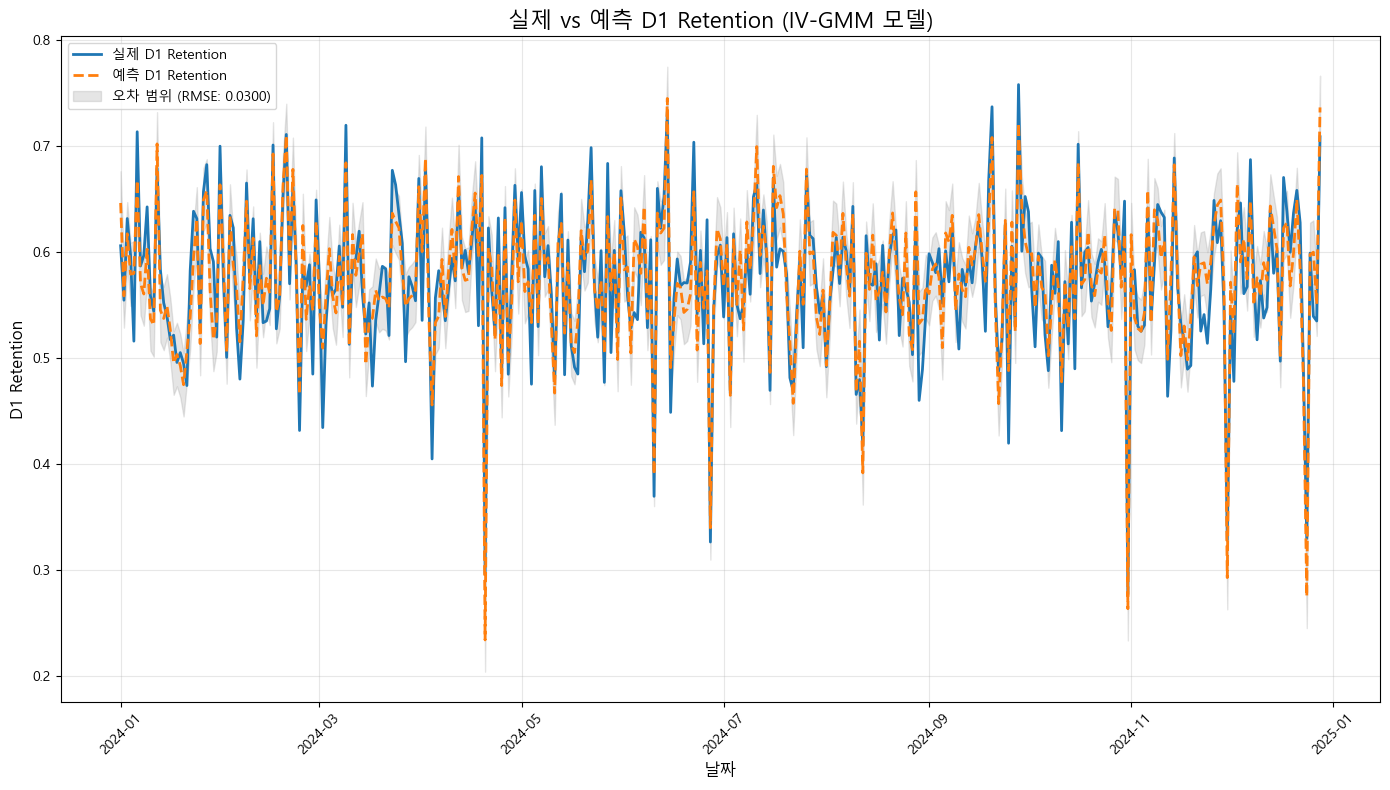

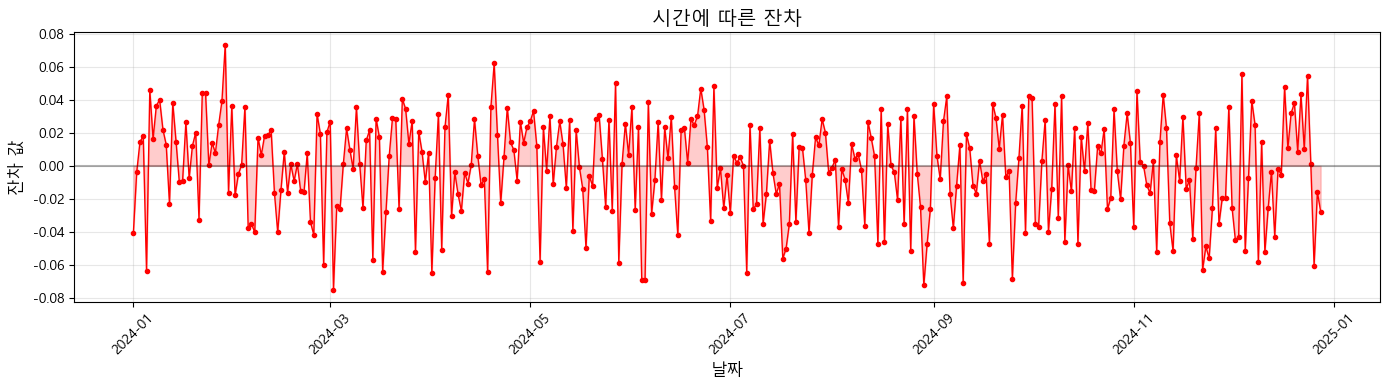

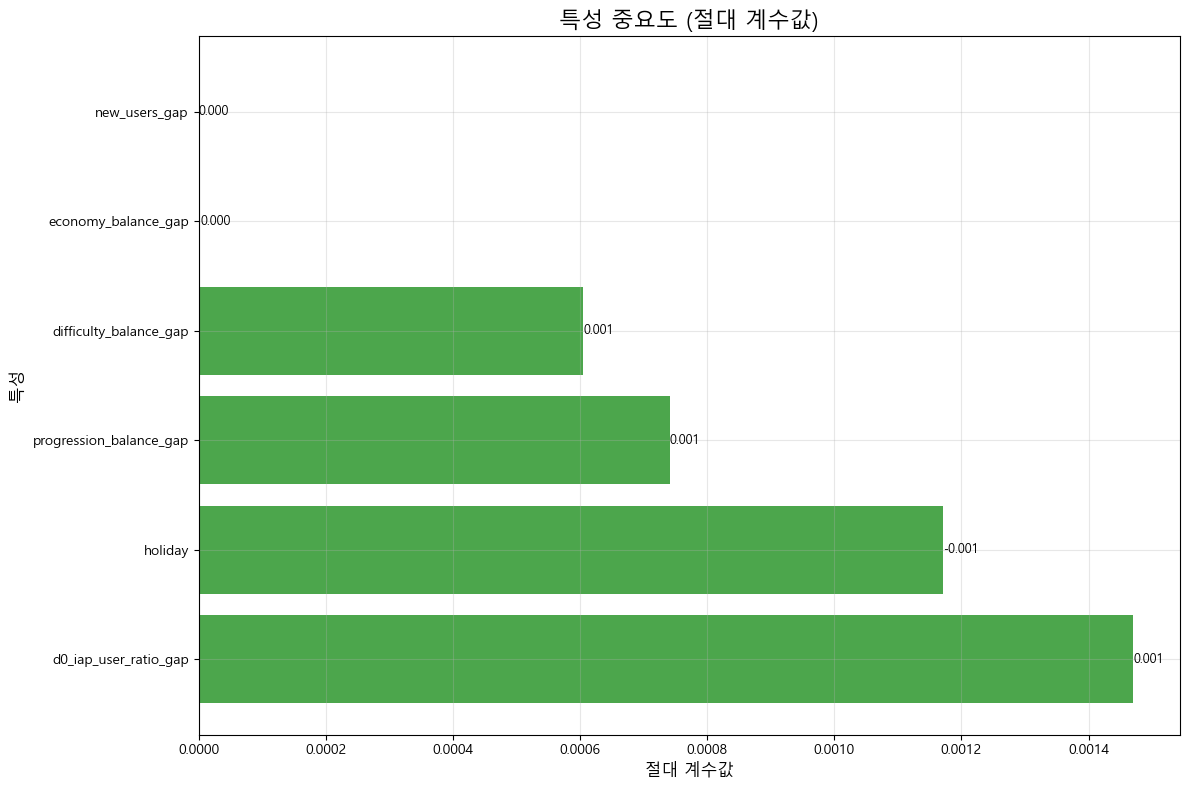

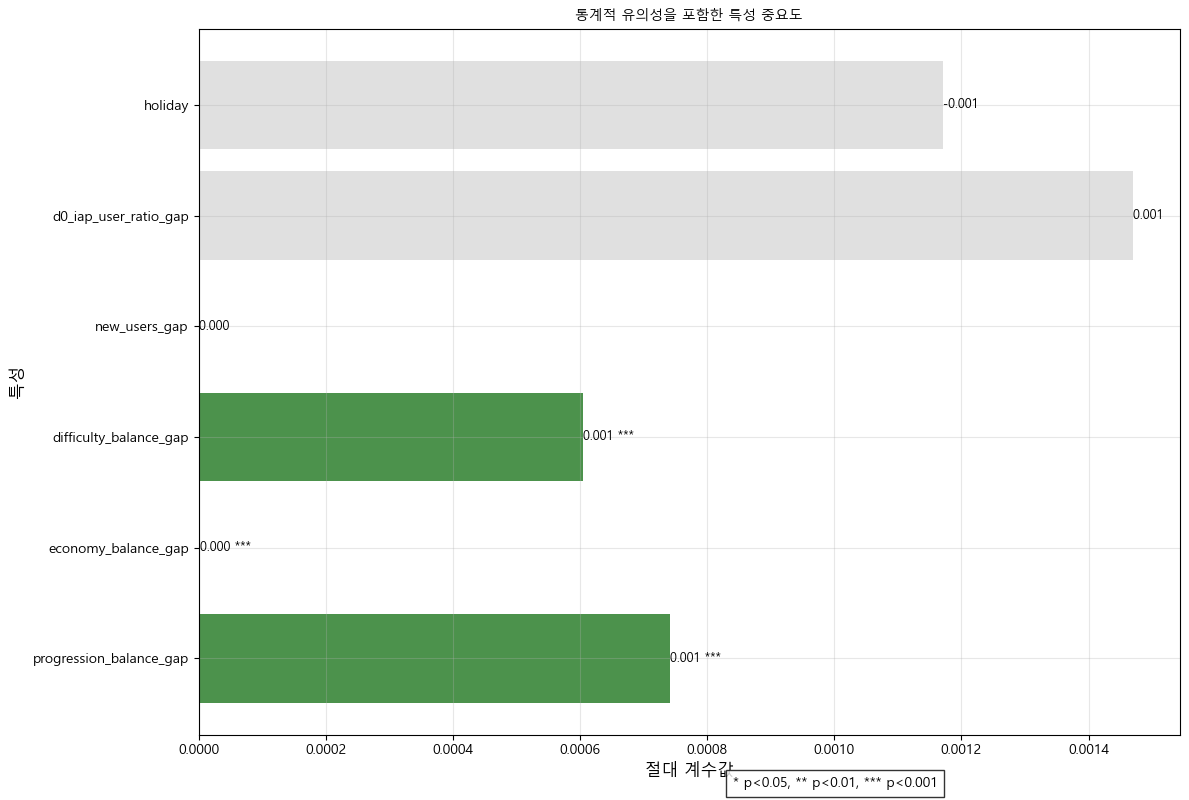

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from linearmodels.iv import IVGMM
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# 한글 폰트 설정 - IPython/Jupyter 환경에서의 문제 해결
import matplotlib.font_manager as fm
import matplotlib as mpl
import platform
import os

# 시스템 확인
system = platform.system()

# 폰트 직접 지정 방식 (가장 확실한 방법)
if system == 'Windows':
    if os.path.exists(r'C:\Windows\Fonts\malgun.ttf'):
        font_path = r'C:\Windows\Fonts\malgun.ttf'
    elif os.path.exists(r'C:\Windows\Fonts\gulim.ttc'):
        font_path = r'C:\Windows\Fonts\gulim.ttc'
    else:
        font_path = None
elif system == 'Darwin':  # macOS
    if os.path.exists('/System/Library/Fonts/AppleGothic.ttf'):
        font_path = '/System/Library/Fonts/AppleGothic.ttf'
    else:
        font_path = None
else:  # Linux
    font_candidates = [
        '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
        '/usr/share/fonts/nanum/NanumGothic.ttf'
    ]
    font_path = next((f for f in font_candidates if os.path.exists(f)), None)

# 폰트 등록 및 설정
if font_path:
    # print(f"사용할 폰트 경로: {font_path}")
    # 폰트 등록
    font_name = fm.FontProperties(fname=font_path).get_name()
    mpl.font_manager.fontManager.addfont(font_path)
    
    # 글꼴 설정
    plt.rcParams['font.family'] = font_name
else:
    print("적절한 한글 폰트를 찾을 수 없습니다. matplotlib 한글 폰트 패키지를 설치해보세요.")
    try:
        # matplotlib-inline 패키지 설치되어 있다면 사용
        import matplotlib_inline
        print("matplotlib-inline 패키지가 설치되어 있습니다. 이 설정을 시도합니다.")
        mpl.rc('font', family='NanumGothic')
    except ImportError:
        # 대체 방법: 기본 폰트 중에서 최대한 한글을 지원하는 것 사용
        mpl.rc('font', family='DejaVu Sans')

# 추가 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# matplotlib 폰트 전체에 적용될 기본 폰트 설정 (모든 요소에 적용)
import matplotlib.pyplot as plt

# 모든 그래프 요소에 대해 폰트 설정을 명시적으로 적용하는 함수
def set_korean_fonts_for_plot():
    """모든 그래프 요소에 한글 폰트를 적용합니다."""
    plt.rcParams['font.family'] = 'sans-serif'
    if font_path:
        font_prop = fm.FontProperties(fname=font_path)
        plt.title('한글 테스트', fontproperties=font_prop)
        plt.xlabel('한글 테스트', fontproperties=font_prop)
        plt.ylabel('한글 테스트', fontproperties=font_prop)
        return font_prop
    return None


# 한글 폰트 객체 생성 (이후 모든 그래프에서 직접 지정 가능)
if font_path:
    korean_font = fm.FontProperties(fname=font_path)
else:
    korean_font = None

# 📌 모델 예측값 계산
y_actual = y.values
params = results.params
X_with_endog = X.copy()
X_with_endog[['progression_balance_gap', 'economy_balance_gap', 'difficulty_balance_gap']] = endog

y_pred = np.sum(X_with_endog.values * params.values, axis=1)

# 📌 시각화를 위한 DataFrame 생성
pred_df = pd.DataFrame({
    'Date': df.index[:len(y_actual)],  # 인덱스 맞추기
    'Actual': y_actual,
    'Predicted': y_pred
})

# 📌 오차 지표 계산
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

print(f"📊 모델 성능 지표:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"결정계수(R-squared): {r2:.4f}")

# 1️⃣ **실제 vs 예측값 플롯**
plt.figure(figsize=(14, 8))
plt.plot(pred_df['Date'], pred_df['Actual'], label='실제 D1 Retention', linewidth=2)
plt.plot(pred_df['Date'], pred_df['Predicted'], label='예측 D1 Retention', linewidth=2, linestyle='--')

plt.fill_between(pred_df['Date'], pred_df['Predicted'] - rmse, pred_df['Predicted'] + rmse,
                 alpha=0.2, color='gray', label=f'오차 범위 (RMSE: {rmse:.4f})')

plt.title('실제 vs 예측 D1 Retention (IV-GMM 모델)', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('D1 Retention', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ **잔차 플롯**
pred_df['Residuals'] = pred_df['Actual'] - pred_df['Predicted']
plt.figure(figsize=(14, 4))
plt.plot(pred_df['Date'], pred_df['Residuals'], color='red', marker='o', linestyle='-', linewidth=1, markersize=3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.fill_between(pred_df['Date'], 0, pred_df['Residuals'], alpha=0.2, color='red')

plt.title('시간에 따른 잔차', fontsize=14)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('잔차 값', fontsize=12)
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3️⃣ **특성 중요도 플롯 (계수값 기준)**

importance_df = pd.DataFrame({
    'Feature': params.index[1:],  # 상수 제거
    'Coefficient': params.values[1:]
})
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df.sort_values('Abs_Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Abs_Coefficient'], color='green', alpha=0.7)

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"{importance_df['Coefficient'].iloc[i]:.3f}", va='center', fontsize=9)

plt.title('특성 중요도 (절대 계수값)', fontsize=16)
plt.xlabel('절대 계수값', fontsize=12)
plt.ylabel('특성', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# p-값에 기반한 통계적 유의성 수준을 보여주는 두 번째 중요도 플롯 생성
# 특성, 계수, p-값이 있는 DataFrame 생성
p_values = results.pvalues
features = params.index[1:]  # 상수항 건너뛰기
importance_df_with_pvals = pd.DataFrame({
    'Feature': features,
    'Coefficient': params.values[1:],
    'P_Value': p_values.values[1:]
})

# TypeError 방지를 위해 Feature 열을 문자열로 변환
importance_df_with_pvals['Feature'] = importance_df_with_pvals['Feature'].astype(str)

# p-값(통계적 유의성)으로 정렬
importance_df_with_pvals.sort_values('P_Value', inplace=True)

# 유의성 수준 마커 정의
def significance_marker(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

# 유의성 마커 추가
importance_df_with_pvals['Significance'] = importance_df_with_pvals['P_Value'].apply(significance_marker)

# 플롯 생성
plt.figure(figsize=(12, 8))
bar_colors = ['darkgreen' if x < 0.05 else 'lightgray' for x in importance_df_with_pvals['P_Value']]
bars = plt.barh(importance_df_with_pvals['Feature'], np.abs(importance_df_with_pvals['Coefficient']), color=bar_colors, alpha=0.7)

# 텍스트로 계수값 및 유의성 마커 추가 (텍스트 위치 조정)
for i, bar in enumerate(bars):
    # 바의 끝에 텍스트가 들어가도록 위치 조정
    plt.text(
        bar.get_width(),  # 텍스트가 바의 오른쪽에 가까워지도록
        bar.get_y() + bar.get_height()/2,
        f"{importance_df_with_pvals['Coefficient'].iloc[i]:.3f} {importance_df_with_pvals['Significance'].iloc[i]}",
        va='center', ha='left', fontsize=9
    )

plt.title('통계적 유의성을 포함한 특성 중요도', fontsize=16, fontproperties=korean_font)
plt.xlabel('절대 계수값', fontsize=12, fontproperties=korean_font)
plt.ylabel('특성', fontsize=12, fontproperties=korean_font)
plt.grid(True, alpha=0.3)

# 유의성 수준에 대한 범례 추가
plt.figtext(0.7, 0.01, "* p<0.05, ** p<0.01, *** p<0.001", ha="center", fontsize=10, 
            bbox={"facecolor":"white", "alpha":0.8, "pad":5}, fontproperties=korean_font)

plt.tight_layout()
plt.show()
